# Twitter Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
data1=pd.read_csv('train.csv')
print(data1.isna().sum())
data1=data1.dropna()

text         1
sentiment    0
dtype: int64


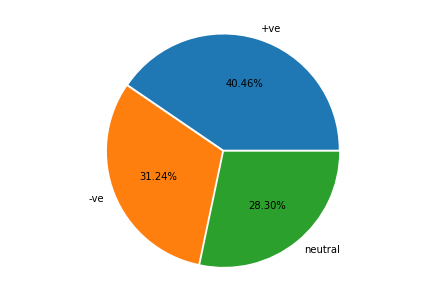

In [3]:
counts=data1['sentiment'].value_counts()
counts

from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
lab = ['+ve','-ve','neutral']
ax.pie(counts,labels=lab,autopct='%1.2f%%',explode=(0.01,0.01,0.01))
plt.show()

# Some techniques to get the insights of text data

In [4]:
tokens=nltk.word_tokenize(data1.text[1])
print(tokens)

['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']


In [5]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(data1.text[1])
print(tokenized_word)

['Playing', 'Ghost', 'Online', 'is', 'really', 'interesting', '.', 'The', 'new', 'updates', 'are', 'Kirin', 'pet', 'and', 'Metamorph', 'for', 'third', 'job', '.', 'Can', '`', 't', 'wait', 'to', 'have', 'a', 'dragon', 'pet']


# Lexicon Normalization

In [6]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = data1.text[1]
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: Playing Ghost Online is really interesting. The new updates are Kirin pet and Metamorph for third job.  Can`t wait to have a dragon pet
Stemmed Word: playing ghost online is really interesting. the new updates are kirin pet and metamorph for third job.  can`t wait to have a dragon pet


In [7]:
from nltk.tokenize import sent_tokenize
text=data1.text[2]
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['is cleaning the house for her family who is comming later today..']


In [8]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['is', 'cleaning', 'the', 'house', 'for', 'her', 'family', 'who', 'is', 'comming', 'later', 'today..']


In [9]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 11 samples and 12 outcomes>


In [10]:
fdist.most_common()

[('is', 2),
 ('cleaning', 1),
 ('the', 1),
 ('house', 1),
 ('for', 1),
 ('her', 1),
 ('family', 1),
 ('who', 1),
 ('comming', 1),
 ('later', 1),
 ('today..', 1)]

# Frequency Distribution Plot for a single sentance

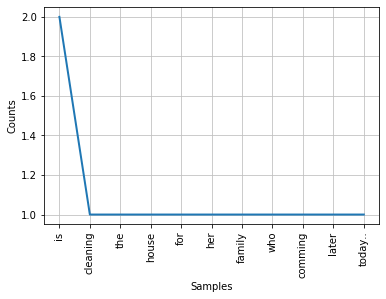

In [11]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

# Stopwords are those that donot contribute for the sentiment analysis

In [12]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'hasn', 'y', 'on', 'am', 'will', 'out', 'can', "mightn't", 'you', 'own', 'how', 'by', 'couldn', 'ours', 'myself', 'aren', 'during', 'she', 'just', 'about', 'who', 'hers', 'don', 'as', 'd', 'isn', "you're", 'here', 'more', 'this', 'doing', "it's", 'few', 'yourself', 'now', 'he', 'mightn', "needn't", 'into', 'having', 'her', 'him', 'why', 'any', 'for', 'have', 'a', 're', 'not', 'against', "mustn't", 'of', 'll', 'off', 'from', 'further', "wouldn't", 'than', 'down', 'shouldn', 'your', 'both', "hasn't", 'so', "she's", 'some', 'should', 'had', 'doesn', 'my', 'me', 'over', 'all', 'mustn', 'with', 'm', 'between', 'because', 'again', "weren't", 'then', 'does', 'once', 'same', "you'll", 'most', 'himself', 'their', 'yours', 'up', 'were', 'yourselves', 'ourselves', 'itself', 'whom', 'theirs', 'but', 'or', 'before', 'there', 'won', 'in', 'his', 'ma', 'did', 'didn', 'until', "you've", "wasn't", 'what', 'only', 'being', "should've", 'where', 's', "hadn't", "you'd", "don't", 'if', 'while', 'i', 'no',

In [13]:
tokenized_sent = tokenized_word

# Removing the stopwords from a given sentance

In [14]:
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['is', 'cleaning', 'the', 'house', 'for', 'her', 'family', 'who', 'is', 'comming', 'later', 'today..']
Filterd Sentence: ['cleaning', 'house', 'family', 'comming', 'later', 'today..']


# Stemming

In [15]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['cleaning', 'house', 'family', 'comming', 'later', 'today..']
Stemmed Sentence: ['clean', 'hous', 'famili', 'com', 'later', 'today..']


# removing symbols and numbers 

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data1['text'])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data1['sentiment'], test_size=0.3, random_state=1)

# building a Multinominal Naive Bayes Classifier

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

clf = MultinomialNB().fit(X_train, y_train)
y_pred= clf.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6438372799028537

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1347,  817,  202],
       [ 526, 2201,  584],
       [ 121,  683, 1754]], dtype=int64)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.68      0.57      0.62      2366
     neutral       0.59      0.66      0.63      3311
    positive       0.69      0.69      0.69      2558

    accuracy                           0.64      8235
   macro avg       0.65      0.64      0.64      8235
weighted avg       0.65      0.64      0.64      8235



# saving the model

In [21]:
import joblib
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

['finalized_model.sav']

In [22]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.6438372799028537


# Fitting the model on the Validation dataset

In [23]:
df1=pd.read_csv('validation.csv')
df1.head()

,text
0,Last session of the day http://twitpic.com/67ezh
1,Shanghai is also really exciting (precisely -...
2,"Recession hit Veronique Branquinho, she has to..."
3,happy bday!
4,http://twitpic.com/4w75p - I like it!!


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df1['text'])

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=7225) 
X = cv.fit_transform(data1['text']).toarray()
X_train1, X_test1, y_train1, y_test1= train_test_split(X, data1['sentiment'], test_size = 0.20, random_state = 123)

In [26]:
from sklearn.naive_bayes import MultinomialNB
mod =MultinomialNB()
mod.fit(X_train1, y_train1)
predictions = mod.predict(X_test1)
print(classification_report(y_test1, predictions))

              precision    recall  f1-score   support

    negative       0.76      0.43      0.55      1600
     neutral       0.54      0.82      0.65      2186
    positive       0.76      0.57      0.65      1704

    accuracy                           0.63      5490
   macro avg       0.69      0.61      0.62      5490
weighted avg       0.67      0.63      0.62      5490

